In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

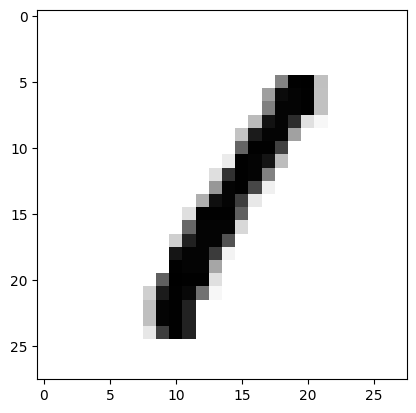

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [64]:
import matplotlib.pyplot as plt
plt.imshow(train_images[3],cmap=plt.cm.binary)
plt.show()
print(train_labels[3])

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# 1 Dense layers (adam, default)

In [5]:
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8482 - loss: 0.5396
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9596 - loss: 0.1445
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9735 - loss: 0.0924
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9805 - loss: 0.0677
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9853 - loss: 0.0502


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0812
test_acc: 0.9783999919891357


# 1 Dense layer (adam, several lr parameters)

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

# Значения learning_rate, которые мы будем тестировать
learning_rates = [0.01, 0.001, 0.0005, 0.0001]

# Сохраним истории обучения
histories = {}

for lr in learning_rates:
    print(f"\n Обучаем модель с learning_rate = {lr}")
    
    # Создание модели
    model_adam_lr = Sequential()
    model_adam_lr.add(Input(shape=(28, 28)))
    model_adam_lr.add(Flatten())
    model_adam_lr.add(Dense(256, activation='relu'))
    model_adam_lr.add(Dense(10, activation='softmax'))
    
    # Компиляция с текущим learning_rate
    optimizer = Adam(learning_rate=lr)
    model_adam_lr.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Обучение
    history = model_adam_lr.fit(train_images, train_labels, 
                        epochs=5, batch_size=128, verbose=0)
    
    # Сохраняем историю обучения
    histories[lr] = history



 Обучаем модель с learning_rate = 0.01

 Обучаем модель с learning_rate = 0.001

 Обучаем модель с learning_rate = 0.0005

 Обучаем модель с learning_rate = 0.0001


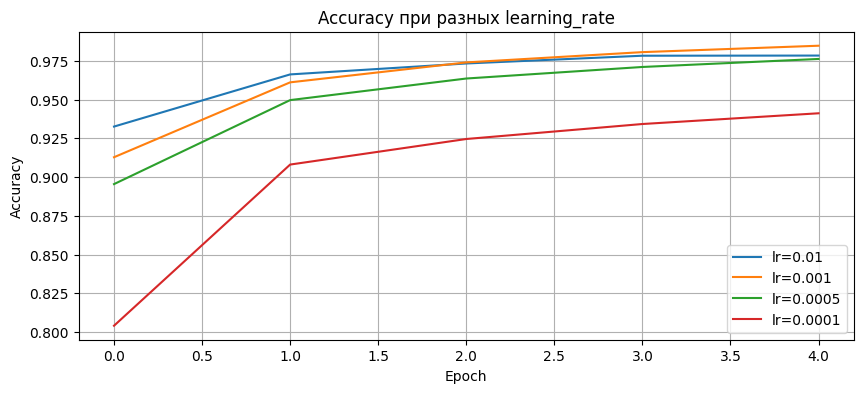

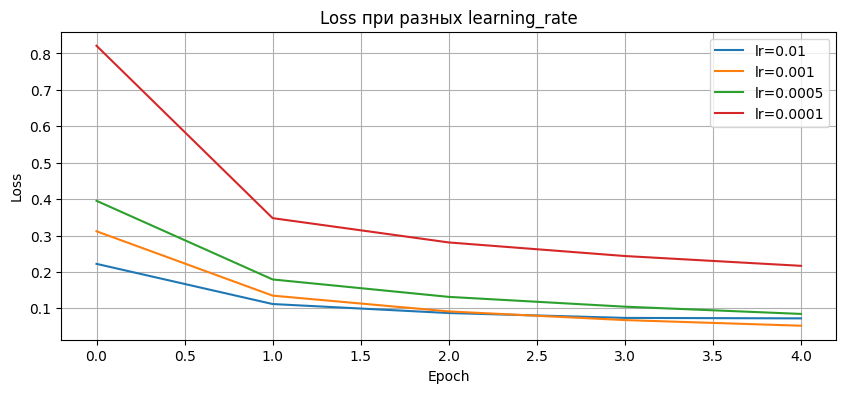

In [19]:
# График точности
plt.figure(figsize=(10, 4))
for lr, hist in histories.items():
    plt.plot(hist.history['accuracy'], label=f'lr={lr}')
plt.title('Accuracy при разных learning_rate')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# График потерь
plt.figure(figsize=(10, 4))
for lr, hist in histories.items():
    plt.plot(hist.history['loss'], label=f'lr={lr}')
plt.title('Loss при разных learning_rate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 1 Dense layer (nadam, default parameters)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Nadam

# Создание модели
model_nadam = Sequential()
model_nadam.add(Input(shape=(28, 28)))
model_nadam.add(Flatten())
model_nadam.add(Dense(256, activation='relu'))
model_nadam.add(Dense(10, activation='softmax'))

In [23]:
model_nadam.compile(
    optimizer=Nadam(learning_rate=0.001),  # можно менять learning_rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
history_nadam = model_nadam.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8385 - loss: 0.5982 - val_accuracy: 0.9590 - val_loss: 0.1451
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9590 - loss: 0.1467 - val_accuracy: 0.9705 - val_loss: 0.1056
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9716 - loss: 0.0977 - val_accuracy: 0.9745 - val_loss: 0.0879
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9807 - loss: 0.0673 - val_accuracy: 0.9773 - val_loss: 0.0784
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9852 - loss: 0.0526 - val_accuracy: 0.9790 - val_loss: 0.0722


In [25]:
test_loss_nadam, test_acc_nadam = model_nadam.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0857
Test accuracy: 0.9783999919891357


# 1 Dense layer (nadam, several lr parameters)

In [29]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Nadam
from keras.utils import to_categorical

# Значения learning_rate, которые мы будем тестировать
learning_rates_nadam = [0.01, 0.001, 0.0005, 0.0001]

# Сохраним истории обучения
histories_nadam = {}

for lr in learning_rates_nadam:
    print(f"\n Обучаем модель с learning_rate = {lr}")
    
    # Создание модели
    
    # Создание модели
    model_nadam_lr = Sequential()
    model_nadam_lr.add(Input(shape=(28, 28)))
    model_nadam_lr.add(Flatten())
    model_nadam_lr.add(Dense(256, activation='relu'))
    model_nadam_lr.add(Dense(10, activation='softmax'))
    
    # Компиляция с текущим learning_rate
    optimizer = Nadam(learning_rate=lr)
    model_nadam_lr.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Обучение
    history_nadam = model_nadam_lr.fit(train_images, train_labels, 
                        epochs=5, batch_size=128, verbose=0)
    
    # Сохраняем историю обучения
    histories_nadam[lr] = history_nadam



 Обучаем модель с learning_rate = 0.01

 Обучаем модель с learning_rate = 0.001

 Обучаем модель с learning_rate = 0.0005

 Обучаем модель с learning_rate = 0.0001


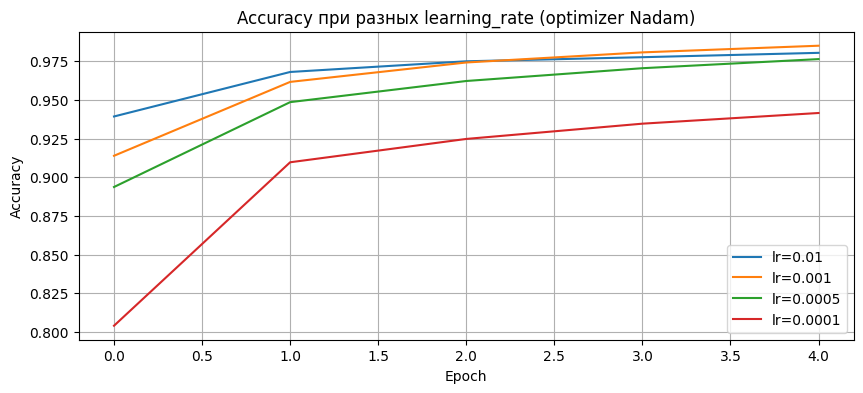

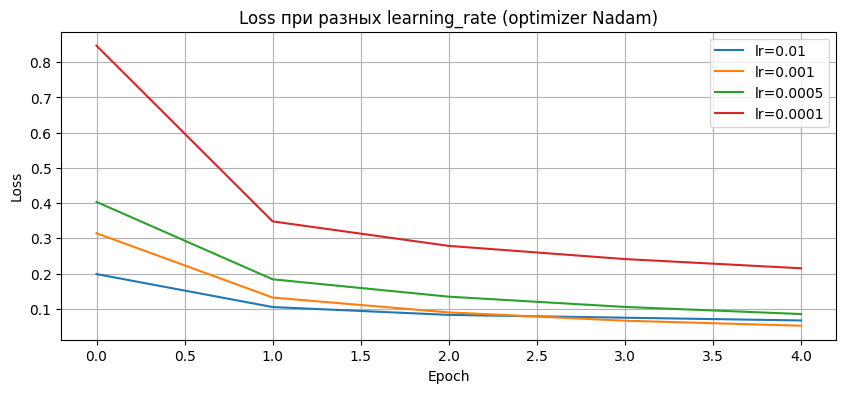

In [31]:
# График точности
plt.figure(figsize=(10, 4))
for lr, hist in histories_nadam.items():
    plt.plot(hist.history['accuracy'], label=f'lr={lr}')
plt.title('Accuracy при разных learning_rate (optimizer Nadam)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# График потерь
plt.figure(figsize=(10, 4))
for lr, hist in histories_nadam.items():
    plt.plot(hist.history['loss'], label=f'lr={lr}')
plt.title('Loss при разных learning_rate (optimizer Nadam)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2 Dense layers with Dropouts, adam, default

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

model_2 = Sequential()
model_2.add(Input(shape=(28, 28)))        
model_2.add(Flatten())                   
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(10, activation='softmax'))


In [10]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model_2.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8576 - loss: 0.4768
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9641 - loss: 0.1142
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9766 - loss: 0.0738
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9826 - loss: 0.0569
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9855 - loss: 0.0452
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9891 - loss: 0.0367
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9891 - loss: 0.0331
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9894 - loss: 0.0297
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9904 - loss: 0.0284
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9920 - loss: 0.0245


In [13]:
test_loss_2, test_acc_2 = model_2.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc_2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9767 - loss: 0.0936
Test accuracy: 0.9793000221252441


# Function to predict a new uploaded image

In [50]:
from PIL import Image, ImageOps
import numpy as np

def prepare_image_for_mnist(path):
    # Загружаем и конвертируем в градации серого
    img = Image.open(path).convert('L')  # 'L' — grayscale

    # Инвертируем (если цифра тёмная на светлом фоне — это хорошо)
    img = ImageOps.invert(img)

    # Приводим к размеру 28x28
    img = img.resize((28, 28))

    # Преобразуем в массив numpy и нормализуем
    img_array = np.array(img).astype('float32') / 255.0

    # Проверим — если фон чёрный, а цифра светлая, то инвертируем снова
    if img_array.mean() > 0.5:  # фон слишком светлый
        img_array = 1 - img_array

    # Возвращаем в формате для MLP модели
    img_array = img_array.reshape(1, 28, 28)
    return img_array


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Модель думает, что это: 5


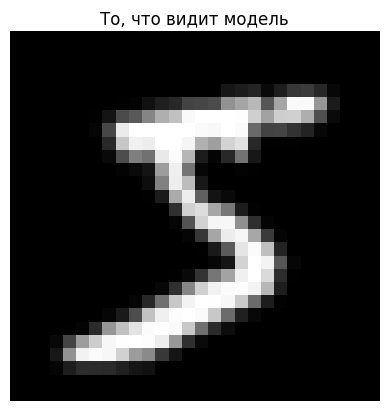

In [58]:
img_array = prepare_image_for_mnist("5.jpg")
prediction = model.predict(img_array)
print("Модель думает, что это:", np.argmax(prediction))

import matplotlib.pyplot as plt
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title("То, что видит модель")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Модель думает, что это: 0


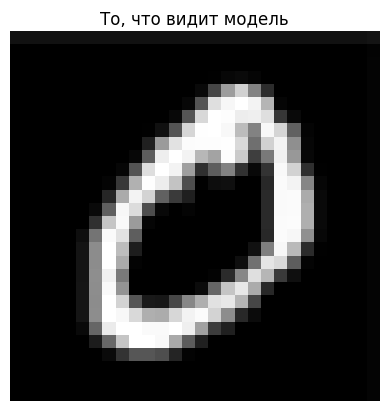

In [61]:
img_array = prepare_image_for_mnist("0.jpg")
prediction = model.predict(img_array)
print("Модель думает, что это:", np.argmax(prediction))

import matplotlib.pyplot as plt
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title("То, что видит модель")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Модель думает, что это: 4


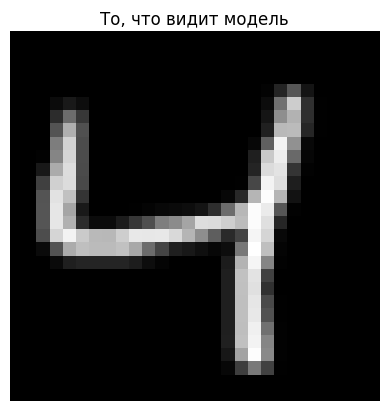

In [63]:
img_array = prepare_image_for_mnist("4.jpg")
prediction = model.predict(img_array)
print("Модель думает, что это:", np.argmax(prediction))

import matplotlib.pyplot as plt
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title("То, что видит модель")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Модель думает, что это: 1


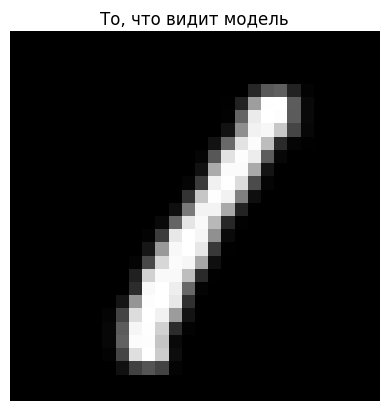

In [65]:
img_array = prepare_image_for_mnist("1.jpg")
prediction = model.predict(img_array)
print("Модель думает, что это:", np.argmax(prediction))

import matplotlib.pyplot as plt
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title("То, что видит модель")
plt.axis('off')
plt.show()